# Introduction to the `crunchflow.output` package

The `crunchflow.output` package is designed to support analyses with the reactive transport code CrunchFlow. It provides classes for analyzing spatial and time series output from CrunchFlow simulations.

## 1. Loading and Plotting `TimeSeries` Data

The `TimeSeries` class is designed to work with time series data output from CrunchFlow simulations using the `time_series_print` key. The output contains time-varying concentrations at an individual grid cell. Here's an example:

In [1]:
# Import the TimeSeries class
from crunchflow.output import TimeSeries

# Load a sample time series file as a TimeSeries object
# We simply provide the name and location of the file
ts = TimeSeries("ObservationWell01.txt", folder="output_files")

# Now that we've loaded it in, this TimeSeries object has methods
# and attributes associated with it. For example, we can print the
# coordinate (grid cell) at which this time series was recorded
print("(x, y, z):", ts.coords)

(x, y, z): (100, 1, 1)


In [2]:
# We can also print a list of the species included in this file
print("Species:", ts.species)

Species: ['pH', 'H+', 'CO3--', 'SO4--', 'Cl-', 'Ca++', 'Mg++', 'Na+', 'K+', 'Fe++', 'Fe+++', 'HS-', 'CH3COO-', 'O2(aq)', 'S(aq)', 'Br-', 'CH3COOH(aq)', 'CaOH+', 'CaCH3COO+', 'CaHCO3+', 'CaCO3(aq)', 'CaSO4(aq)', 'H2CO3(aq)', 'HCO3-', 'FeOH+', 'FeCH3COO+', 'FeHCO3+', 'FeCO3(aq)', 'Fe(CO3)2--', 'FeSO4(aq)', 'FeCl+', 'Fe(HS)2(aq)', 'Fe(HS)3-', 'H2S(aq)', 'S--', 'KSO4-', 'MgOH+', 'MgCH3COO+', 'MgHCO3+', 'MgCO3(aq)', 'MgSO4(aq)', 'NaCH3COO(aq)', 'NaHCO3(aq)', 'NaCO3-', 'NaSO4-', 'HSO4-', 'OH-']


In [3]:
# These are a couple of the attributes associated with the object. To
# get a list of all of the object's attributes, we can use the `__dict__`
# method, which prints a dictionary of all the object's attributes and their
# values. Note that we're only printing out the keys (the attribute names)
# of the dictionary, since the values can be quite long.
print("Current attributes:", ts.__dict__.keys())

Current attributes: dict_keys(['coords', 'columns', 'species', 'timeunit', 'unit', 'data', 'df'])


In [4]:
# From the keys above, we can see that another TimeSeries object attribute
# is the concentration unit, which is mol/L by default
print("Units before conversion:", ts.unit)

# There are also some useful methods associated with TimeSeries objects. One of these
# is TimeSeries.convert_mgL(), which converts concentration units from mol/L to mg/L.
# The convert_mgL() method reads the geochemical database ('datacom.dbs') to determine
# the molecular weights of the species, so we need to specify the location of that file.
ts.convert_mgL("datacom.dbs", folder="output_files", warnings=False)

# Note that this method modifies the object in place, so we can see that the unit has changed
# (And if we run this cell again without first re-loading the data, the "Units before conversion"
# will already be in mg/L)
print("Units after conversion:", ts.unit)

Units before conversion: mol/L
Units after conversion: mg/L


In [5]:
# We can also extract TimeSeries data to more common formats, such as a pandas DataFrame

# Create a DataFrame object from the time series data
# A DataFrame is similar to a spreadsheet, with rows and columns. In this case, the
# index (or row labels) are the time steps, and the columns are the species concentrations
df = ts.df

# Print the first few rows of the DataFrame
print(df.head())

                    pH        H+     CO3--        SO4--         Cl-  \
time                                                                  
6.700000e-07  7.999961  0.000012  0.279317  4125.053652  599.138834   
6.553900e-04  8.000170  0.000012  0.279451  4124.028641  599.138834   
2.297420e-02  8.000515  0.000012  0.279668  4123.437587  599.138834   
8.601720e-02  8.000515  0.000012  0.279668  4123.437590  599.138834   
1.954520e-01  8.000516  0.000012  0.279668  4123.437598  599.138834   

                    Ca++        Mg++          Na+         K+          Fe++  \
time                                                                         
6.700000e-07  282.854554  258.861717  2253.310221  18.485284  1.511896e-12   
6.553900e-04  282.361626  258.876408  2253.334040  18.485539  1.265156e-08   
2.297420e-02  282.104305  258.875386  2253.341453  18.485613  4.680757e-07   
8.601720e-02  282.104304  258.875386  2253.341453  18.485613  1.752481e-06   
1.954520e-01  282.104303  258.8753

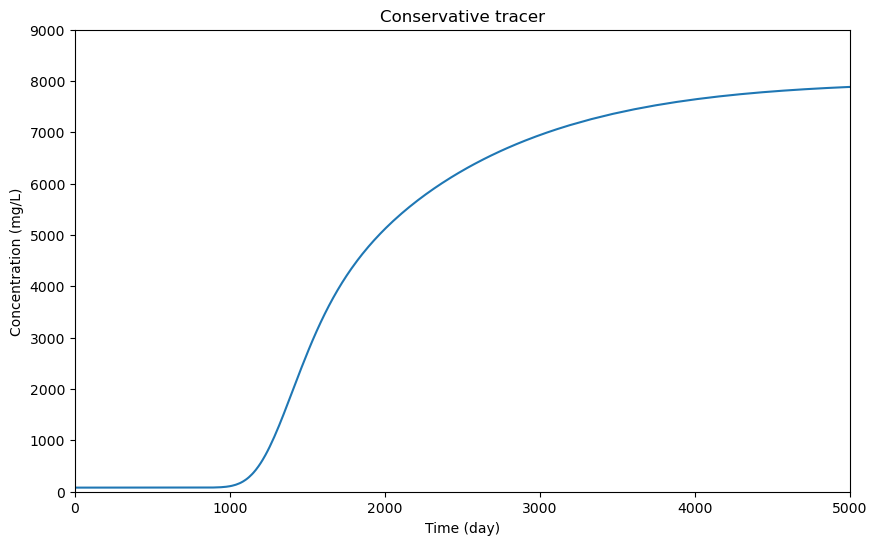

In [6]:
import matplotlib.pyplot as plt

# Plot the data using matplotlib
# (The only change from the first example plot is that now we're
# specifying the figure size, in inches)
fig, ax = plt.subplots(figsize=(10, 6))

# The index of the dataframe is the time step, so we'll plot that along the x-axis
ax.plot(df.index, df["Br-"], label="Bromide")

# In the example above, we used separate commands to set the title, x-axis label, y-axis label,
# and x-axis limits. We can also do this in a single command
ax.set(
    title="Conservative tracer",
    xlabel="Time (%s)" % ts.timeunit,
    ylabel="Concentration (%s)" % ts.unit,
    xlim=(0, 5000),
    ylim=(0, 9000),
)

# Show the plot
plt.show()

## 2. Loading and Plotting `SpatialProfile` Data

While `TimeSeries` objects plot time-varying data from a single grid cell, `SpatialProfile` objects plot spatially varying data at a single snapshot in time. These can include porosity, permeability, mineral volume fractions, reaction rates, and more. Here's an example where we plot bromide concentrations from a 2D simulation:

In [7]:
# Import the SpatialProfile class
from crunchflow.output import SpatialProfile

# Initialize a SpatialProfile object
# Typically, we'll have CrunchFlow output multiple profiles over the course of
# a simulation. Since these are named sequentially ('conc1.out', 'conc2.out', etc),
# we just have to provide the prefix ('conc') and the folder containing the files
conc = SpatialProfile("conc", folder="output_files")

# These output files are from a 2D simulation of a conservative tracer,
# so that should be reflected in the nx, ny, nz and column attributes
print("Dimensions:", conc.nx, conc.ny, conc.nz)
print("Columns:", conc.columns)

# We can also print the "times" attribute, which is a list of each file's output
# number (i.e., the "1", "2", "3" in 'conc1.out', 'conc2.out', 'conc3.out', etc.)
# There is also the "output_times" attribute, which is the time (in simulation time units)
# that each file was output, but that isn't always read in automatically (it depends
# on the version of CrunchFlow/CrunchTope you have)
print("Output numbers:", conc.times)

Dimensions: 100 20 1
Columns: ['Br-']
Output numbers: [1, 2, 3, 4, 5, 6]


In [8]:
# To save computation time, the data is not read in immediately. Instead, we can read
# in the data to a numpy array using the `extract` method. Simply provide the name of
# the variable to extract and the time step at which to extract it.
data = conc.extract("Br-", time=1)
print("Minimum concentration (mol/L): %0.5f" % 10 ** data.min())
print("Maximum concentration (mol/L): %0.5f" % 10 ** data.max())

Minimum concentration (mol/L): 0.00100
Maximum concentration (mol/L): 0.00124


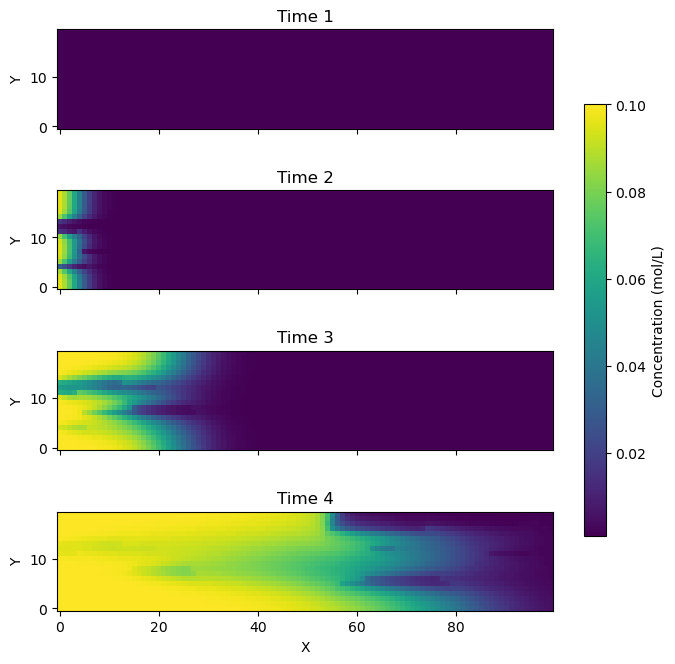

In [9]:
# Create a plot of Br- concentrations for the first 4 time steps
# Note: the (4, 1) specifies that we want 4 rows and 1 column. `sharex`
# specifies that all subplots should share the same x-axis
fig, axs = plt.subplots(4, 1, figsize=(8, 8), sharex=True)

# Loop over each axis object in the list
# Note that `i` is a counter
for i, ax in enumerate(axs):
    # Extract the data for the current time step
    # (Note that `i` starts at zero, but the time steps start at 1)
    data = conc.extract("Br-", time=i + 1)

    # Plot the data as an image, saving the handle of the image
    # object (`im`) since we will use that later.
    # Note that CrunchFlow outputs logged values, so we need to
    # take 10 to the power of the data to get the actual concentrations.
    # Also, note that we set vmin and vmax (min and max color ranges) to
    # ensure that the colorbar is consistent across all subplots.
    im = ax.imshow(10**data, origin="lower", vmin=0.001, vmax=0.1)

    # Set the ylabel and title for the current subplot
    ax.set(ylabel="Y", title="Time %d" % (i + 1))

# Add x-axis label to the last subplot
axs[-1].set(xlabel="X")

# Add a colorbar to the plot
fig.colorbar(im, ax=axs, label="Concentration (mol/L)", shrink=0.7)

# Show the plot
plt.show()

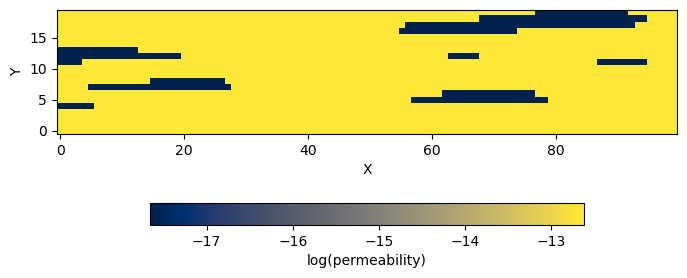

In [10]:
# To understand the concentration patterns in the plot above,
# we can plot permeability and see that the tracer is moving
# around some low-permeability zones
perm = SpatialProfile("permeability", folder="output_files")

# Plot permeability at the first time step
fig, ax = plt.subplots(figsize=(8, 6))

# Extract the permeability data
data = perm.extract("X-Perm", time=1)

# Plot it using a different cmap (colormap) to differentiate it
# from the concentration plots above.
im = ax.imshow(data, origin="lower", cmap="cividis")

# Add a colorbar
fig.colorbar(im, ax=ax, label="log(permeability)", orientation="horizontal", shrink=0.7)

# Add axis labels
ax.set(xlabel="X", ylabel="Y")

plt.show()